In [25]:
import networkx as nx
import json
import itertools
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import re
import collections

Read in graph and detailed compound data

In [26]:
# G = nx.read_edgelist("data/kegg-edge-sub-sub-edge.dat")

In [27]:
reactions = dict()
for fname in glob.glob("../../BioXP/kegg/2018-09-25/reaction/*"):
    with open(fname) as f:
        reaction_json = json.load(f)[0]
        reactions[reaction_json["entry_id"]] = reaction_json

In [28]:
compounds = dict()
for fname in glob.glob("../../BioXP/kegg/2018-09-25/compound/*"):
    with open(fname) as f:
        compound_json = json.load(f)[0]
        compounds[compound_json["entry_id"]] = compound_json

In [29]:
reactions["R00001"]

{'comment': '',
 'definition': 'Polyphosphate + n H2O <=> (n+1) Oligophosphate',
 'orthologs': {},
 'name': 'polyphosphate polyphosphohydrolase',
 'product_stoichiometries': ['(n+1)'],
 'enzymes': ['3.6.1.10'],
 'equation': 'C00404 + n C00001 <=> (n+1) C02174',
 'glycans': False,
 'substrate_stoichiometries': ['n', '1'],
 'rpairs': {},
 'entry_id': 'R00001',
 'pathways': {},
 'products': ['C02174'],
 'substrates': ['C00001', 'C00404']}

In [30]:
compounds["C00012"]

{'entry_id': 'C00012',
 'name': 'Peptide',
 'names': ['Peptide'],
 'formula': 'C2H4NO2R(C2H2NOR)n',
 'exact_mass': 0.0,
 'mol_weight': 0.0,
 'remark': '',
 'comment': 'Generic compound in reaction hierarchy',
 'reactions': ['R00135',
  'R01578',
  'R01687',
  'R04159',
  'R04869',
  'R04935',
  'R09845'],
 'pathways': {'map00330': 'Arginine and proline metabolism'},
 'enzymes': ['2.3.2.2', '3.4.11.5', '3.4.22.-', '3.4.24.84', '3.4.-.-'],
 'dblinks': {'PubChem': ['3314'], 'ChEBI': ['16670']},
 'kcf': 'ATOM        11\n            1   N1a N    17.9900  -14.8400\n            2   C1c C    19.2024  -14.1400\n            3   C5a C    20.4149  -14.8400\n            4   N1b N    21.6273  -14.1400\n            5   C1c C    22.8397  -14.8400\n            6   C6a C    24.0522  -14.1400\n            7   O6a O    25.2646  -14.8400\n            8   O6a O    24.0522  -12.7403\n            9   O5a O    20.4149  -16.2398\n            10  R   R    22.8397  -16.2399\n            11  R   R    19.2024  -12.

In [32]:
for i in compounds:
    elements = re.findall(r"([A-Z][a-z]?)",compounds[i]['formula'])
    compounds[i]["elements"] = set(elements)

In [33]:
for i,c in enumerate(compounds):
    print(c,compounds[c]['elements'])
    if i==20: break

C01802 {'O', 'C', 'H'}
C14303 {'O', 'C', 'H'}
C08320 {'O', 'C', 'H'}
C11101 {'O', 'C', 'H'}
C19531 {'N', 'Na', 'S', 'C', 'O', 'H'}
C05512 {'N', 'O', 'C', 'H'}
C07485 {'N', 'O', 'C', 'H'}
C00340 set()
C08770 {'O', 'C', 'H'}
C15841 set()
C14753 {'O', 'C', 'H'}
C09862 {'N', 'O', 'C', 'H'}
C11551 {'O', 'C', 'H'}
C16294 {'O', 'C', 'H'}
C02687 {'N', 'C', 'R', 'O', 'H'}
C03995 {'N', 'O', 'C', 'H'}
C19161 {'Cr'}
C01101 {'O', 'C', 'H', 'P'}
C15512 {'O', 'C', 'H'}
C09531 {'O', 'C', 'H'}
C11802 {'N', 'S', 'C', 'O', 'H'}


In [47]:
compounds["C00001"]["elements"]

{'H', 'O'}

In [55]:
apparate_reactions = dict()
for r in reactions:
    
    elements_sub = set()
    elements_prod = set()
    
    if "substrates" in reactions[r]:
        for c in reactions[r]["substrates"]:
            if c in compounds:
                elements_sub = elements_sub.union(compounds[c]['elements'])
    
    if "products" in reactions[r]:
        for c in reactions[r]["products"]:
            if c in compounds:
                elements_prod = elements_prod.union(compounds[c]['elements'])
        
    if elements_sub != elements_prod:
        apparate_reactions[reactions[r]["entry_id"]] = list(elements_sub^elements_prod)
        print(reactions[r]["entry_id"],elements_sub^elements_prod)
#         print(reactions[r]["entry_id"],elements_sub^elements_prod,elements_sub,elements_prod)
        

R11305 {'P'}
R08431 {'O'}
R07547 {'R'}
R10685 {'S'}
R10390 {'S'}
R04146 {'C'}
R08535 {'O'}
R06317 {'O'}
R07443 {'O', 'C', 'H'}
R10152 {'Sn', 'S'}
R00914 {'S', 'P'}
R08427 {'O'}
R03142 {'N', 'C'}
R03841 {'P', 'H'}
R04886 {'N', 'C'}
R08519 {'P'}
R00083 {'C'}
R04613 {'R'}
R07341 {'P'}
R04644 {'R'}
R00312 {'N', 'C', 'Fe', 'O', 'H'}
R00168 {'P'}
R07838 {'S', 'O'}
R05106 {'R'}
R03656 {'R'}
R09467 {'O', 'C'}
R03986 {'N', 'P', 'C'}
R08299 {'O'}
R11470 {'S'}
R08578 {'R'}
R04808 {'S'}
R02876 {'C', 'H'}
R02460 {'N', 'O', 'C', 'H'}
R09851 {'Cl'}
R09144 {'Cl'}
R09847 {'R'}
R05188 {'R'}
R01348 {'R'}
R08885 {'N'}
R03660 {'R'}
R08779 {'R'}
R03836 {'O', 'R'}
R03135 {'C'}
R11671 {'N', 'P', 'R'}
R01734 {'O'}
R05777 {'P'}
R04977 {'N', 'Fe', 'O', 'C', 'H'}
R00172 {'P', 'Se'}
R02620 {'R'}
R08411 {'N'}
R00164 {'N', 'P', 'C', 'R'}
R08780 {'R'}
R06321 {'O', 'P'}
R01237 {'C', 'O'}
R00077 {'P'}
R04937 {'C'}
R08502 {'N', 'O'}
R06320 {'N'}
R08040 {'N', 'O'}
R00165 {'P'}
R03876 {'R'}
R03175 {'N', 'S', 'C', 'P', 'O'

In [56]:
len(apparate_reactions)

353

In [58]:
for r in apparate_reactions:
    print(r,reactions[r]["comment"])

R11305 unclear reaction
R08431 multi-step reaction incomplete reaction
R07547 
R10685 thiamine thiazole synthase multi-step reaction Sulfur donor is enzyme itself (one cystein residue looses H2S to form dehydroalanie residue)
R10390 
R04146 
R08535 unclear reaction multi-step reaction incomplete reaction
R06317 unclear reaction
R07443 oxidative polymerization (see R02596, R03919, R04007)
R10152 
R00914 unclear reaction incomplete reaction (CoA donor not yet characterized)
R08427 multi-step reaction incomplete reaction
R03142 general reaction (see R08515)
R03841 general reaction (see R08404,R08405,R08406 and R08407)
R04886 
R08519 Thyroglobulin synthesis (ribosome) incomplete reaction
R00083 general reaction
R04613 
R07341 
R04644 
R00312 
R00168 incomplete reaction
R07838 unclear reaction
R05106 
R03656 
R09467 
R03986 
R08299 unclear reaction incomplete reaction
R11470 unclear reaction incomplete reaction
R08578 
R04808 incomplete reaction
R02876 general reaction (see R07322 and R0732

In [39]:
a = set()
a = a.union(set([1,2]))

In [40]:
a

{1, 2}

In [38]:
a

set()

In [ ]:
a.

regex to use:

In [1]:
import re

In [14]:
match = re.match(r"([A-Z][a-z]?)",'CHNa9PHHe')

In [16]:
search = re.search(r"([A-Z][a-z]?)",'CHNa9PHHe')

In [21]:
findall = re.findall(r"([A-Z][a-z]?)",'CHNa9PHHe')

In [23]:
set(findall)

{'C', 'H', 'He', 'Na', 'P'}

In [10]:
([A-Z][a-z]?)

SyntaxError: invalid syntax (<ipython-input-10-fc825b5269a0>, line 1)

Above header:
`Pubchem Substance				Total Walk Count	Log Total Walk Count	Basak Total Information Content of Degree 0	Basak Total Information Content of Degree 1	Basak Total Information Content of Degree 2	Path Count	Crippen SlogP	van der Waals Volume A3	Exact Monoisotopic Mass`

In [5]:
df = pd.read_csv("data/KeggDescriptorsFinal.4.29.19.csv",header=1)

In [6]:
df.head()

,sid,Kegg Compound Number,SMILES,MolGen Molecule #,twc,log twc,TIC_0,TIC_1,TIC_2,P,slog P,V_vdw,mass_exact
0,3303.0,C00001,O,3303,NaN,#VALUE!,NaN,NaN,NaN,0,-0.8247,25.489,18.011
1,3304.0,C00002,P(=O)(OP(=O)(OP(=O)(O)O)O)(OC[C@H]1O[C@@H](n2c...,3304,3.330000e+13,13.52253552,99.376,186.54,223.56,1839,-2.9568,296.790,507.000
2,3305.0,C00003,P(=O)(OC[C@H]1O[C@@H](n2c3ncnc(N)c3nc2)[C@H](O...,3305,6.820000e+18,18.83372069,142.440,297.40,370.72,6134,-4.3654,417.500,664.120
3,3306.0,C00004,P(=O)(OC[C@H]1O[C@@H](n2c3ncnc(N)c3nc2)[C@H](O...,3306,6.820000e+18,18.83372069,143.780,297.37,374.35,6134,-3.7991,420.980,665.120
4,3307.0,C00005,P(=O)(O[C@H]1[C@@H](O[C@@H]([C@H]1O)COP(=O)(OP...,3307,3.620000e+20,20.55905635,156.920,320.62,406.49,6916,-3.8972,454.580,745.090


### Look at correlation of columns in data from Jim

In [7]:
df.columns

Index(['sid', 'Kegg Compound Number', 'SMILES', 'MolGen Molecule #', 'twc',
       'log twc', 'TIC_0', 'TIC_1', 'TIC_2', 'P', 'slog P', 'V_vdw',
       'mass_exact'],
      dtype='object')

In [8]:
cols_to_corr = ['twc','log twc', 'TIC_0', 'TIC_1', 'TIC_2', 'P', 'slog P', 'V_vdw', 'mass_exact']

In [9]:
corr_df = df[cols_to_corr].corr()

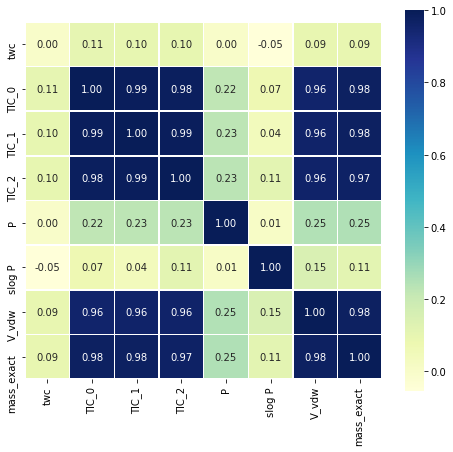

In [10]:
plt.figure(figsize=(8,7))
sns.heatmap(corr_df,annot=True,linewidths=.5,fmt=".2f",square=True,cmap="YlGnBu")

A few different groups:
- `mass_exact`, `TIC_0`, `TIC_1`, `TIC_2`, `V_vdw`
- `twc`
- `P`
- `slog P`

### KEGG w/out SMILES vs KEGG w/SMILES

In [11]:
cids_with_smiles = set(df["Kegg Compound Number"])

In [12]:
len(cids_with_smiles)

15799

In [13]:
[cid for cid in cids_with_smiles if not str(cid).startswith("C")]

[nan, 'Apiget', 'No KEGG']

Hmm... mislabel for compound ID, let's investigate

In [14]:
df.loc[df["Kegg Compound Number"]=="Apiget"]

,sid,Kegg Compound Number,SMILES,MolGen Molecule #,twc,log twc,TIC_0,TIC_1,TIC_2,P,slog P,V_vdw,mass_exact
2653,7199.0,Apiget,o1c2c(c(O)cc(O[C@@H]3O[C@@H]([C@@H](O)[C@H](O)...,7199,2.680000e+13,13.42842639,77.397,158.96,231.38,2928,-0.1823,304.94,432.11


In [15]:
df.loc[df["Kegg Compound Number"]=="No KEGG"]

,sid,Kegg Compound Number,SMILES,MolGen Molecule #,twc,log twc,TIC_0,TIC_1,TIC_2,P,slog P,V_vdw,mass_exact
2812,7522.0,No KEGG,O1C([C@H](OC)[C@@H](OC(=O)c2[nH]c(cc2)C)[C@@H]...,7522,5.350000e+33,33.72798021,226.430,484.680,701.77,132840,2.4887,762.78,1109.40
3704,8791.0,No KEGG,O1[C@@H]([C@@H](O)Cc2c1cc(O)cc2O)c1cc(O)c(O)cc1,8791,1.977000e+09,9.296006669,52.109,100.560,140.31,985,2.1115,212.64,290.08
4259,9498.0,No KEGG,O=C(O)CCCCCCC/C=C\CC#CCCCCC,9498,1.740900e+07,7.240773825,57.927,94.292,141.75,190,5.3317,241.75,278.22


In [16]:
df.loc[df["Kegg Compound Number"].isnull()]

,sid,Kegg Compound Number,SMILES,MolGen Molecule #,twc,log twc,TIC_0,TIC_1,TIC_2,P,slog P,V_vdw,mass_exact
9093,NaN,NaN,O1C2(O)CC(O)C(C1CC(O[C@@H]1O[C@@H]([C@@H](O)[C...,853865,5.620000e+31,31.74952762,235.28,487.87,775.630,12511,2.7584,798.960,1096.60
13750,NaN,NaN,c1(ccccc1)C=C,124490178,2.802000e+03,3.447468131,16.00,24.49,41.735,59,2.2248,95.541,104.06


In [17]:
len([cid for cid in cids_with_smiles if str(cid).startswith("C")])

15796

In [18]:
len(set([cid for cid in cids_with_smiles if str(cid).startswith("C")]))

15796

In [19]:
cids_with_smiles = [cid for cid in cids_with_smiles if str(cid).startswith("C")]

In [20]:
len(G.nodes())

7671

In [21]:
len(compounds)

18181

In [22]:
len(G.edges)

26253

Load newest version of KEGG data

In [23]:
master_fname = "../ecg/ecg-testing/kegg/master.json"
with open(master_fname) as f:
    master = json.load(f)

In [24]:
master.keys()

dict_keys(['version', 'reactions'])

In [25]:
len(master["reactions"].keys())

10764

In [100]:
Gfull = nx.Graph()

In [101]:
for r in master["reactions"]:
    left = master["reactions"][r]["left"]
    right = master["reactions"][r]["right"]
    Gfull.add_edges_from(list(itertools.product(left,right)))

In [102]:
len(Gfull.nodes())

8667

Number of non-glycan compounds without SMILES strings

In [31]:
nosmiles = list(set(Gfull.nodes())-set(cids_with_smiles))

In [32]:
Gsmiles = copy.deepcopy(Gfull)

In [33]:
Gsmiles.remove_nodes_from(nosmiles)

In [34]:
len(Gsmiles.nodes())

7080

Let's look at some topological differences between the networks:
- degree
- clustering
- assortativity
- shortest path
- betweenness

And degree distributions.

#### Get a dataframe of the sorted nodes and degrees

In [68]:
cpddeg_list = sorted([(n,d) for n, d in Gfull.degree()], key=lambda tup: tup[1], reverse=True)  # degree sequence


In [71]:
dict(Gfull.degree())

{'C00024': 207,
 'C00010': 405,
 'C20672': 2,
 'C20638': 4,
 'C19848': 5,
 'C18237': 9,
 'C00020': 267,
 'C00001': 2522,
 'C06232': 3,
 'C00355': 22,
 'C08543': 8,
 'C08538': 10,
 'C13635': 3,
 'C00156': 35,
 'C00058': 87,
 'C00007': 1552,
 'C01157': 12,
 'C01877': 3,
 'C00005': 954,
 'C00080': 1694,
 'C00006': 842,
 'C04671': 4,
 'C04707': 4,
 'C20398': 6,
 'C20397': 7,
 'C00042': 144,
 'C00011': 552,
 'C00026': 259,
 'C02094': 16,
 'C08592': 9,
 'C05698': 6,
 'C05335': 14,
 'C04144': 3,
 'C04489': 3,
 'C00096': 37,
 'C00035': 71,
 'C04097': 2,
 'C01923': 3,
 'C00002': 621,
 'C00008': 424,
 'C00093': 32,
 'C00116': 25,
 'C06717': 10,
 'C11502': 3,
 'C05618': 4,
 'C03572': 4,
 'C05437': 7,
 'C05439': 5,
 'C21156': 3,
 'C06802': 2,
 'C16488': 3,
 'C16489': 4,
 'C00112': 20,
 'C00055': 75,
 'C00009': 498,
 'C01888': 8,
 'C00546': 21,
 'C00014': 321,
 'C00027': 250,
 'C00030': 246,
 'C00028': 225,
 'C06605': 4,
 'C06604': 8,
 'C20896': 2,
 'C00679': 10,
 'C00063': 50,
 'C00061': 40,
 'C00

In [61]:
Gfull.degree()

DegreeView({'C00024': 207, 'C00010': 405, 'C20672': 2, 'C20638': 4, 'C19848': 5, 'C18237': 9, 'C00020': 267, 'C00001': 2522, 'C06232': 3, 'C00355': 22, 'C08543': 8, 'C08538': 10, 'C13635': 3, 'C00156': 35, 'C00058': 87, 'C00007': 1552, 'C01157': 12, 'C01877': 3, 'C00005': 954, 'C00080': 1694, 'C00006': 842, 'C04671': 4, 'C04707': 4, 'C20398': 6, 'C20397': 7, 'C00042': 144, 'C00011': 552, 'C00026': 259, 'C02094': 16, 'C08592': 9, 'C05698': 6, 'C05335': 14, 'C04144': 3, 'C04489': 3, 'C00096': 37, 'C00035': 71, 'C04097': 2, 'C01923': 3, 'C00002': 621, 'C00008': 424, 'C00093': 32, 'C00116': 25, 'C06717': 10, 'C11502': 3, 'C05618': 4, 'C03572': 4, 'C05437': 7, 'C05439': 5, 'C21156': 3, 'C06802': 2, 'C16488': 3, 'C16489': 4, 'C00112': 20, 'C00055': 75, 'C00009': 498, 'C01888': 8, 'C00546': 21, 'C00014': 321, 'C00027': 250, 'C00030': 246, 'C00028': 225, 'C06605': 4, 'C06604': 8, 'C20896': 2, 'C00679': 10, 'C00063': 50, 'C00061': 40, 'C00255': 12, 'C00029': 179, 'C00015': 305, 'C03962': 2, 'C0

In [52]:
cpddeg_list

[('C00001', 2522),
 ('C00080', 1694),
 ('C00007', 1552),
 ('C00005', 954),
 ('C00006', 842),
 ('C00004', 823),
 ('C00003', 796),
 ('C00002', 621),
 ('C00011', 552),
 ('C00009', 498),
 ('C00019', 492),
 ('C00008', 424),
 ('C00010', 405),
 ('C00013', 403),
 ('C00021', 400),
 ('C03024', 343),
 ('C00014', 321),
 ('C00015', 305),
 ('C03161', 270),
 ('C00020', 267),
 ('C00026', 259),
 ('C00027', 250),
 ('C00030', 246),
 ('C00028', 225),
 ('C00024', 207),
 ('C00022', 197),
 ('C00025', 195),
 ('C00029', 179),
 ('C00042', 144),
 ('C00138', 137),
 ('C00448', 131),
 ('C00033', 130),
 ('C00139', 119),
 ('C00083', 112),
 ('C00031', 99),
 ('C00363', 94),
 ('C00051', 91),
 ('C00058', 87),
 ('C00229', 81),
 ('C00016', 80),
 ('C00037', 80),
 ('C00073', 80),
 ('C01352', 78),
 ('C00055', 75),
 ('C00035', 71),
 ('C00067', 70),
 ('C00043', 67),
 ('C00053', 64),
 ('C00054', 63),
 ('C01327', 62),
 ('C00097', 62),
 ('C00041', 61),
 ('C00048', 59),
 ('C00082', 57),
 ('C00052', 55),
 ('C00353', 55),
 ('C00040',

In [58]:
cpdsmiles_df = df[["Kegg Compound Number","SMILES"]]

In [59]:
cpdsmiles_df.head()

,Kegg Compound Number,SMILES
0,C00001,O
1,C00002,P(=O)(OP(=O)(OP(=O)(O)O)O)(OC[C@H]1O[C@@H](n2c...
2,C00003,P(=O)(OC[C@H]1O[C@@H](n2c3ncnc(N)c3nc2)[C@H](O...
3,C00004,P(=O)(OC[C@H]1O[C@@H](n2c3ncnc(N)c3nc2)[C@H](O...
4,C00005,P(=O)(O[C@H]1[C@@H](O[C@@H]([C@H]1O)COP(=O)(OP...


In [56]:
len(compounds)

18181

In [75]:
Gfulldegdict = dict(Gfull.degree())

In [77]:
new_Gfulldegdict = {}

In [78]:
for k in Gfulldegdict:
    if type(Gfulldegdict[k])==int:
        new_Gfulldegdict[k] = Gfulldegdict[k]

In [79]:
len(Gfulldegdict)

8667

In [80]:
len(new_Gfulldegdict)

8667

In [76]:
[type(Gfulldegdict[k]) for k in Gfulldegdict]

[int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int

In [87]:
def addname(row):
    if row["Kegg Compound Number"] in compounds:
        return compounds[row["Kegg Compound Number"]]["name"]
    else:
        return np.nan
def adddeg(row):
    if row["Kegg Compound Number"] in Gfulldegdict:
        return Gfulldegdict[row["Kegg Compound Number"]]
    else:
        return np.nan

In [88]:
cpdsmiles_df.head()

,Kegg Compound Number,SMILES
0,C00001,O
1,C00002,P(=O)(OP(=O)(OP(=O)(O)O)O)(OC[C@H]1O[C@@H](n2c...
2,C00003,P(=O)(OC[C@H]1O[C@@H](n2c3ncnc(N)c3nc2)[C@H](O...
3,C00004,P(=O)(OC[C@H]1O[C@@H](n2c3ncnc(N)c3nc2)[C@H](O...
4,C00005,P(=O)(O[C@H]1[C@@H](O[C@@H]([C@H]1O)COP(=O)(OP...


In [89]:
cpdsmiles_df["deg"] = cpdsmiles_df.apply(lambda row: adddeg(row),axis=1)

/Users/anarres/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
cpdsmiles_df["name"] = cpdsmiles_df.apply(lambda row: addname(row),axis=1)

/Users/anarres/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
cpdsmiles_df.head()

,Kegg Compound Number,SMILES,deg,name
0,C00001,O,2522.0,H2O
1,C00002,P(=O)(OP(=O)(OP(=O)(O)O)O)(OC[C@H]1O[C@@H](n2c...,621.0,ATP
2,C00003,P(=O)(OC[C@H]1O[C@@H](n2c3ncnc(N)c3nc2)[C@H](O...,796.0,NAD+
3,C00004,P(=O)(OC[C@H]1O[C@@H](n2c3ncnc(N)c3nc2)[C@H](O...,823.0,NADH
4,C00005,P(=O)(O[C@H]1[C@@H](O[C@@H]([C@H]1O)COP(=O)(OP...,954.0,NADPH


In [95]:
cpdsmiles_df.sort_values(by=['deg'],ascending=False,inplace=True)

/Users/anarres/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
cpdsmiles_df.head()

,Kegg Compound Number,SMILES,deg,name
0,C00001,O,2522.0,H2O
6,C00007,O=O,1552.0,Oxygen
4,C00005,P(=O)(O[C@H]1[C@@H](O[C@@H]([C@H]1O)COP(=O)(OP...,954.0,NADPH
5,C00006,P(=O)(O[C@H]1[C@@H](O[C@@H]([C@H]1O)COP(=O)(OP...,842.0,NADP+
3,C00004,P(=O)(OC[C@H]1O[C@@H](n2c3ncnc(N)c3nc2)[C@H](O...,823.0,NADH


In [97]:
cpdsmiles_df.to_csv("cpddegs.csv")

#### Let's look at disconnected components

In [109]:
cc = list(nx.connected_components(Gfull))

In [117]:
compounds["C00001"]["name"]

'H2O'

In [124]:
smallestcs = [list(c) for c in cc][1:]

In [132]:
newsmallestcs = list()
for c in smallestcs:
    newc = {}
    for i in c:
        if i in compounds:
            newc[i]=compounds[i]["name"]
        else:
            newc[i] = ""
    newsmallestcs.append(newc)
#     print(c)
#     print([(*i) for i in c])
    

In [133]:
newsmallestcs

[{'C05280': 'cis,cis-3,6-Dodecadienoyl-CoA',
  'C05279': 'trans,cis-Lauro-2,6-dienoyl-CoA'},
 {'C19910': 'N-Acetyl-beta-neuraminate',
  'C19909': 'N-Acetyl-alpha-neuraminate'},
 {'C01493': 'Farnesol', 'C16501': 'Farnesal'},
 {'C21513': 'Turicine', 'C08269': '(-)-Betonicine'},
 {'C10172': 'Stachydrine', 'C21514': 'D-Proline betaine'},
 {'C21733': '', 'C21732': '', 'C21734': ''},
 {'C00451': '(1R,2S)-1-Hydroxypropane-1,2,3-tricarboxylate',
  'C04617': '(1S,2S)-1-Hydroxypropane-1,2,3-tricarboxylate'},
 {'C04196': 'Heparosan-N-sulfate D-glucuronate',
  'C04073': 'Heparosan-N-sulfate L-iduronate'},
 {'C22078': '', 'C22077': ''},
 {'C08012': 'Levomethadyl acetate',
  'C16662': 'L-alpha-Acetyl-N,N-dinormethadol',
  'C16661': 'L-alpha-Acetyl-N-normethadol'},
 {'C17139': 'dTDP-3,4-dioxo-2,6-dideoxy-L-glucose',
  'C11931': 'dTDP-2,6-dideoxy-L-glycero-hex-2-enos-4-ulose'},
 {'C22094': '', 'C22096': '', 'C22095': ''},
 {'C03633': 'Peptidylproline (omega=0)',
  'C03798': 'Peptidylproline (omega=180

In [118]:
[(i,compounds[i]["name"]) for i in cc][1:]

TypeError: unhashable type: 'set'

In [57]:
compounds["C00001"]

{'entry_id': 'C00001',
 'name': 'H2O',
 'names': ['H2O', 'Water'],
 'formula': 'H2O',
 'exact_mass': 18.0106,
 'mol_weight': 18.0153,
 'remark': 'Same as: D00001',
 'comment': '',
 'reactions': ['R00001',
  'R00002',
  'R00004',
  'R00005',
  'R00009',
  'R00010',
  'R00011',
  'R00017',
  'R00022',
  'R00024',
  'R00025',
  'R00026',
  'R00028',
  'R00036',
  'R00041',
  'R00044',
  'R00045',
  'R00047',
  'R00048',
  'R00052',
  'R00053',
  'R00054',
  'R00055',
  'R00056',
  'R00058',
  'R00059',
  'R00060',
  'R00061',
  'R00068',
  'R00069',
  'R00070',
  'R00072',
  'R00073',
  'R00074',
  'R00077',
  'R00078',
  'R00080',
  'R00081',
  'R00082',
  'R00083',
  'R00084',
  'R00085',
  'R00086',
  'R00087',
  'R00088',
  'R00090',
  'R00097',
  'R00102',
  'R00103',
  'R00107',
  'R00111',
  'R00113',
  'R00118',
  'R00122',
  'R00123',
  'R00125',
  'R00128',
  'R00131',
  'R00132',
  'R00135',
  'R00138',
  'R00143',
  'R00145',
  'R00146',
  'R00148',
  'R00149',
  'R00152',
  '

In [45]:
cpddeg_list = sorted([{"cpd":n,"deg":d} for n, d in Gfull.degree()], reverse=True)  # degree sequence


TypeError: '<' not supported between instances of 'dict' and 'dict'

#### Degree distributions

In [35]:
degree_sequence = sorted([n,d for n, d in Gfull.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

In [36]:
df_degree = pd.DataFrame()

In [37]:
dict_degree = dict()
df_degree = pd.DataFrame()
graphs = {"Gfull":Gfull,"Gsmiles":Gsmiles}
for g in graphs:
    degree_sequence = sorted([d for n, d in graphs[g].degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    dict_degree["degree"], dict_degree["count"] = zip(*degreeCount.items())
    dict_degree["graph"] = g
    df_degree = df_degree.append(pd.DataFrame(dict_degree),ignore_index=True)

In [38]:
df_degree.head()

,degree,count,graph
0,2522,1,Gfull
1,1694,1,Gfull
2,1552,1,Gfull
3,954,1,Gfull
4,842,1,Gfull


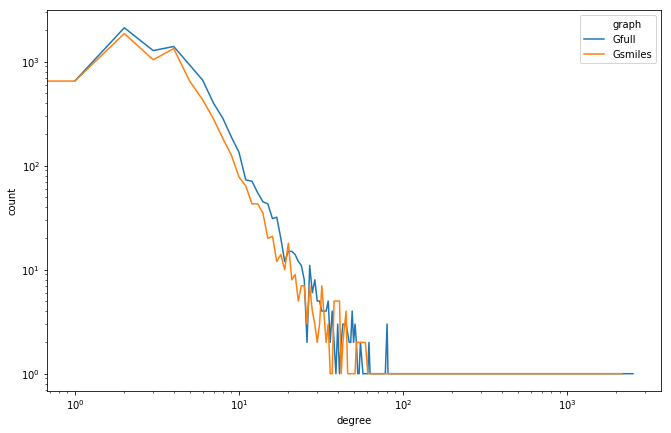

In [39]:
plt.figure(figsize=(11,7))
plt.xscale("log")
plt.yscale("log")
sns.lineplot("degree","count",data=df_degree,hue="graph",markers=True)

#### Components

In [40]:
for g in graphs:
    cc = list(nx.connected_components(graphs[g]))
    print(g)
    print("number of components:",len(cc))
    print("size of largest component:",len(cc[0])/np.sum([len(i) for i in cc]))
    print("component sizes:",[len(i) for i in cc])
    print("\n")

Gfull
number of components: 34
size of largest component: 0.9914618668512749
component sizes: [8593, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Gsmiles
number of components: 35
size of largest component: 0.9913841807909605
component sizes: [7019, 2, 1, 1, 2, 2, 2, 3, 2, 2, 1, 3, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2]




### Violin of centrality and clustering

In [202]:
nx.degree_centrality(Gfull)

{'C00024': 0.02388645280406185,
 'C00010': 0.046734364181860145,
 'C20672': 0.00023078698361412417,
 'C20638': 0.00046157396722824835,
 'C19848': 0.0005769674590353105,
 'C18237': 0.0010385414262635588,
 'C00020': 0.030810062312485578,
 'C00001': 0.29102238633741057,
 'C06232': 0.0003461804754211863,
 'C00355': 0.002538656819755366,
 'C08543': 0.0009231479344564967,
 'C08538': 0.001153934918070621,
 'C13635': 0.0003461804754211863,
 'C00156': 0.004038772213247173,
 'C00058': 0.010039233787214401,
 'C00007': 0.17909069928456037,
 'C01157': 0.001384721901684745,
 'C01877': 0.0003461804754211863,
 'C00005': 0.11008539118393723,
 'C00080': 0.19547657512116318,
 'C00006': 0.09716132010154628,
 'C04671': 0.00046157396722824835,
 'C04707': 0.00046157396722824835,
 'C20398': 0.0006923609508423725,
 'C20397': 0.0008077544426494346,
 'C00042': 0.01661666282021694,
 'C00011': 0.06369720747749827,
 'C00026': 0.02988691437802908,
 'C02094': 0.0018462958689129934,
 'C08592': 0.0010385414262635588,
 

In [204]:
nx.clustering(Gfull)

{'C00024': 0.01735378265559777,
 'C00010': 0.015682679379049016,
 'C20672': 0,
 'C20638': 0.16666666666666666,
 'C19848': 0.4,
 'C18237': 0.19444444444444445,
 'C00020': 0.03398946805215285,
 'C00001': 0.002656004839410953,
 'C06232': 0.6666666666666666,
 'C00355': 0.25263157894736843,
 'C08543': 0.5333333333333333,
 'C08538': 0.13333333333333333,
 'C13635': 0.3333333333333333,
 'C00156': 0.1361344537815126,
 'C00058': 0.06709435979684576,
 'C00007': 0.0031115608819052556,
 'C01157': 0.4696969696969697,
 'C01877': 0.3333333333333333,
 'C00005': 0.0072572324844197185,
 'C00080': 0.004496758670922266,
 'C00006': 0.007857403102855157,
 'C04671': 0.5,
 'C04707': 0.3333333333333333,
 'C20398': 0.7333333333333333,
 'C20397': 0.5714285714285714,
 'C00042': 0.03496503496503497,
 'C00011': 0.015012230726741892,
 'C00026': 0.026847445452096615,
 'C02094': 0.20833333333333334,
 'C08592': 0.7222222222222222,
 'C05698': 0,
 'C05335': 0.0989010989010989,
 'C04144': 0,
 'C04489': 0,
 'C00096': 0.0435

In [240]:
_dict = dict()
df_distributions = pd.DataFrame()
for g in graphs:
    centrality_vals = np.ma.log10(list(nx.degree_centrality(graphs[g]).values()))
    _dict["centrality"] = centrality_vals #list(centrality_vals.compressed())
    _dict["clustering"] = list(nx.clustering(graphs[g]).values())
#     dict_degree["attribute"] = "clustering"
    _dict["graph"] = g
    df_distributions = df_distributions.append(pd.DataFrame(_dict),ignore_index=True)

In [241]:
# collections.Counter(np.log10(list(nx.degree_centrality(graphs[g]).values())))

In [242]:
df_distributions.head()

,centrality,clustering,graph
0,-1.621848,0.017354,Gfull
1,-1.330364,0.015683,Gfull
2,-3.636789,0.000000,Gfull
3,-3.335759,0.166667,Gfull
4,-3.238849,0.400000,Gfull


In [243]:
df_distributions_melt = df_distributions.melt(id_vars="graph",value_vars = ["centrality","clustering"])

In [244]:
df_distributions_melt.head()

,graph,variable,value
0,Gfull,centrality,-1.621848
1,Gfull,centrality,-1.330364
2,Gfull,centrality,-3.636789
3,Gfull,centrality,-3.335759
4,Gfull,centrality,-3.238849


<Figure size 792x504 with 0 Axes>

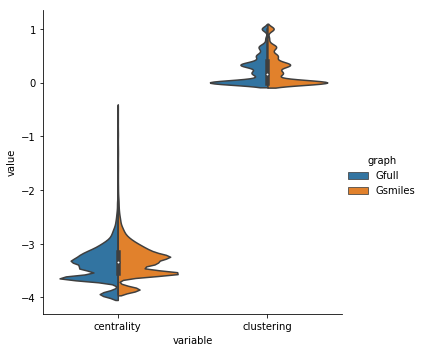

In [245]:
plt.figure(figsize=(11,7))
sns.catplot(x="variable", y="value", hue="graph",
            kind="violin", split=True, data=df_distributions_melt);

In [246]:
for g in graphs:
    print(g,nx.degree_assortativity_coefficient(graphs[g]))

Gfull -0.20948926525654873
Gsmiles -0.19922597141711104


Ok, since the kegg graph that we have smiles data for is about the same as the one we don't have smiles for, we're going to assume we can use them mostly interchangeably. Actually first, let's check the percent of reactions present in the different kegg pathways to see if they differ or are biased from one pathway or another.

In [253]:
pathway_fname = "../ecg/ecg-testing/kegg/lists/pathway.json"
with open(pathway_fname) as f:
    pathway_dict = json.load(f)

In [254]:
cpdpath_fname = "../ecg/ecg-testing/kegg/links/compound_pathway.json"
with open(cpdpath_fname) as f:
    cpdpath_dict = json.load(f)

In [255]:
pathcpd_fname = "../ecg/ecg-testing/kegg/links/pathway_compound.json"
with open(pathcpd_fname) as f:
    pathcpd_dict = json.load(f)

In [261]:
pathcpd_dict

{'path:map00010': ['cpd:C00022',
  'cpd:C00024',
  'cpd:C00031',
  'cpd:C00033',
  'cpd:C00036',
  'cpd:C00068',
  'cpd:C00074',
  'cpd:C00084',
  'cpd:C00103',
  'cpd:C00111',
  'cpd:C00118',
  'cpd:C00186',
  'cpd:C00197',
  'cpd:C00221',
  'cpd:C00236',
  'cpd:C00267',
  'cpd:C00469',
  'cpd:C00631',
  'cpd:C00668',
  'cpd:C01159',
  'cpd:C01172',
  'cpd:C01451',
  'cpd:C05125',
  'cpd:C05345',
  'cpd:C05378',
  'cpd:C06186',
  'cpd:C06187',
  'cpd:C06188',
  'cpd:C15972',
  'cpd:C15973',
  'cpd:C16255'],
 'path:map00020': ['cpd:C00022',
  'cpd:C00024',
  'cpd:C00026',
  'cpd:C00036',
  'cpd:C00042',
  'cpd:C00068',
  'cpd:C00074',
  'cpd:C00091',
  'cpd:C00122',
  'cpd:C00149',
  'cpd:C00158',
  'cpd:C00311',
  'cpd:C00417',
  'cpd:C05125',
  'cpd:C05379',
  'cpd:C05381',
  'cpd:C15972',
  'cpd:C15973',
  'cpd:C16254',
  'cpd:C16255'],
 'path:map00030': ['cpd:C00022',
  'cpd:C00031',
  'cpd:C00117',
  'cpd:C00118',
  'cpd:C00119',
  'cpd:C00121',
  'cpd:C00197',
  'cpd:C00198',
  '

In [259]:
len(pathway_dict)

533

In [260]:
len(pathcpd_dict)

429

Out of 533 pathways in KEGG, only 429 have compounds associated with them (others might have glycans, drugs)

In [262]:
cids_with_smiles

['C09071',
 'C20823',
 'C01929',
 'C07475',
 'C18354',
 'C14808',
 'C00946',
 'C11412',
 'C21957',
 'C06475',
 'C20640',
 'C08779',
 'C08511',
 'C18875',
 'C14527',
 'C17606',
 'C10383',
 'C14802',
 'C16873',
 'C13749',
 'C13901',
 'C14444',
 'C20958',
 'C17251',
 'C08614',
 'C01134',
 'C09585',
 'C20795',
 'C11058',
 'C03709',
 'C11989',
 'C12622',
 'C20008',
 'C07355',
 'C15441',
 'C08679',
 'C09946',
 'C18742',
 'C20207',
 'C00420',
 'C06686',
 'C12051',
 'C21331',
 'C14185',
 'C12027',
 'C17442',
 'C15107',
 'C04807',
 'C20592',
 'C21772',
 'C14638',
 'C10436',
 'C21683',
 'C08925',
 'C11306',
 'C05172',
 'C00655',
 'C03845',
 'C19000',
 'C21640',
 'C15342',
 'C07657',
 'C14836',
 'C05473',
 'C08393',
 'C08942',
 'C09388',
 'C09444',
 'C16835',
 'C17932',
 'C19974',
 'C16275',
 'C12272',
 'C16699',
 'C19642',
 'C09644',
 'C19246',
 'C14682',
 'C09210',
 'C18669',
 'C04882',
 'C07455',
 'C04275',
 'C05707',
 'C11725',
 'C14611',
 'C07884',
 'C15102',
 'C21155',
 'C10397',
 'C15349',

In [271]:
percent_of_pathway_with_smiles = dict()
for p in pathcpd_dict:
    cpds_in_path = set([c.split(":")[1] for c in pathcpd_dict[p]])
    cpds_in_smiles = set(cids_with_smiles)
    percent_of_pathway_with_smiles[p] = 1 - (len(cpds_in_path-cpds_in_smiles)/len(cpds_in_path))
#     print(p,pathway_dict[p],len(cpds_in_path-cpds_in_smiles)/len(cpds_in_path))

In [272]:
# percent_of_pathway_with_smiles

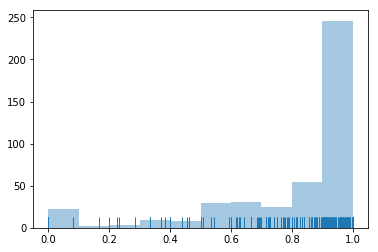

In [274]:
sns.distplot(list(percent_of_pathway_with_smiles.values()), bins=10, kde=False, rug=True);

Normalized distribution of proportion of pathway containing smiles string compounds 

(array([1.86480186e-04, 8.54700855e-04, 1.72639032e-03, 7.19433513e-03,
        7.96648573e-03, 3.51581639e-02, 4.80015588e-02, 4.36618111e-02,
        1.06193752e-01, 5.63540158e-01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

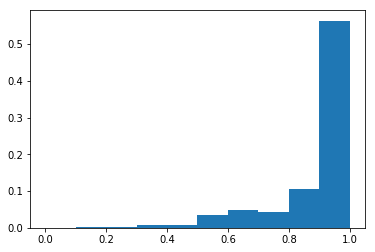

In [291]:
weights = np.array(list(percent_of_pathway_with_smiles.values()))/len(percent_of_pathway_with_smiles.values())
plt.hist(list(percent_of_pathway_with_smiles.values()),weights=weights)

Distribution of pathway lengths

In [293]:
set(pathcpd_dict.keys()) - set(pathway_dict.keys())

set()

In [294]:
set(pathway_dict.keys()) - set(pathcpd_dict.keys())

{'path:map00196',
 'path:map00511',
 'path:map00513',
 'path:map00514',
 'path:map00533',
 'path:map00601',
 'path:map00603',
 'path:map00604',
 'path:map01010',
 'path:map01524',
 'path:map02040',
 'path:map03008',
 'path:map03010',
 'path:map03015',
 'path:map03018',
 'path:map03020',
 'path:map03022',
 'path:map03030',
 'path:map03040',
 'path:map03050',
 'path:map03060',
 'path:map03410',
 'path:map03420',
 'path:map03430',
 'path:map03440',
 'path:map03450',
 'path:map03460',
 'path:map04011',
 'path:map04013',
 'path:map04016',
 'path:map04060',
 'path:map04061',
 'path:map04110',
 'path:map04115',
 'path:map04120',
 'path:map04130',
 'path:map04137',
 'path:map04139',
 'path:map04146',
 'path:map04215',
 'path:map04320',
 'path:map04330',
 'path:map04341',
 'path:map04350',
 'path:map04390',
 'path:map04391',
 'path:map04392',
 'path:map04512',
 'path:map04514',
 'path:map04520',
 'path:map04550',
 'path:map04612',
 'path:map04620',
 'path:map04622',
 'path:map04630',
 'path:map

In [300]:
_list = list()
for p in pathcpd_dict:
    _dict = dict()
    _dict["path_id"] = p.split(":")[1]
    _dict["path_name"] = pathway_dict[p]
    
    cpds_in_path = set([c.split(":")[1] for c in pathcpd_dict[p]])
    _dict["n_cpds"] = len(cpds_in_path)
    _dict["n_cpds_with_smiles"] = len(cpds_in_path - set(cids_with_smiles))
    
    _dict["percent_cpds_with_smiles"] = 1 - (len(cpds_in_path-cpds_in_smiles)/len(cpds_in_path))
    _list.append(_dict)
    
df_pathways = pd.DataFrame(_list)    

In [301]:
df_pathways.head()

,n_cpds,n_cpds_with_smiles,path_id,path_name,percent_cpds_with_smiles
0,31,3,map00010,Glycolysis / Gluconeogenesis,0.903226
1,20,4,map00020,Citrate cycle (TCA cycle),0.800000
2,35,0,map00030,Pentose phosphate pathway,1.000000
3,55,2,map00040,Pentose and glucuronate interconversions,0.963636
4,54,5,map00051,Fructose and mannose metabolism,0.907407


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x150a08e48>]],
      dtype=object)

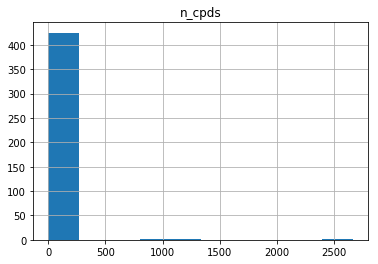

In [304]:
df_pathways.hist("n_cpds")

In [ ]:
plt.figure(figsize=(11,7))
# plt.xscale("log")
# plt.yscale("log")
sns.lineplot("degree","count",data=df_pathways,markers=True)